In [ ]:
import numpy as np 
import os
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error

In [ ]:
df= pd.read_csv('/content/INFY_Final_CNN.csv')

In [ ]:
df

,Date,close,compund,neg,neu,pos,open,high,low,volume
0,04-04-2016,621.849976,0.0000,0.000,1.000,0.000,606.775024,624.000000,606.775024,4577054
1,05-04-2016,609.900024,0.3818,0.000,0.843,0.157,621.000000,621.150024,607.000000,4790716
2,07-04-2016,590.750000,0.0000,0.000,1.000,0.000,604.200012,604.200012,587.500000,5657890
3,11-04-2016,591.950012,-0.4767,0.237,0.763,0.000,582.900024,593.375000,575.549988,5768678
4,12-04-2016,591.099976,0.8807,0.000,0.263,0.737,590.250000,597.450012,589.299988,5842138
...,...,...,...,...,...,...,...,...,...,...
1108,23-04-2021,1333.800049,0.0000,0.000,1.000,0.000,1343.000000,1348.400024,1331.000000,7316262
1109,26-04-2021,1343.550049,0.8225,0.000,0.751,0.249,1332.250000,1351.300049,1321.000000,7088606
1110,27-04-2021,1348.500000,0.2960,0.049,0.852,0.099,1346.000000,1353.000000,1340.150024,3636115
1111,28-04-2021,1356.000000,0.2023,0.000,0.964,0.036,1358.000000,1359.500000,1344.599976,4879234


In [ ]:
df = df.drop(columns=['open','high','low','volume','Date','compund','neg','pos','neu'])
df

,close
0,621.849976
1,609.900024
2,590.750000
3,591.950012
4,591.099976
...,...
1108,1333.800049
1109,1343.550049
1110,1348.500000
1111,1356.000000


In [ ]:
df.head(3)

,close
0,621.849976
1,609.900024
2,590.750000


In [ ]:
#scaler = MinMaxScaler(feature_range=(0,1))
#df = scaler.fit_transform(df)  
df=np.array(df)
y_close = df[:,0]


In [ ]:
y_close

array([ 621.849976,  609.900024,  590.75    , ..., 1348.5     ,
       1356.      , 1356.349976])

In [ ]:
steps=20

In [ ]:
import math

ntrain = math.ceil(len(y_close)*0.8) 
train = df[0:ntrain]
test  = df[ntrain-steps:len(df)]
y_close_train = y_close[0:ntrain]
y_close_test  = y_close[ntrain-steps:len(y_close)]
y_close_test.shape
y_close_test

array([ 623.849976,  628.75    ,  653.299988,  633.200012,  641.849976,
        679.299988,  658.      ,  664.599976,  660.700012,  715.5     ,
        673.700012,  673.700012,  665.900024,  664.950012,  674.200012,
        682.900024,  687.650024,  658.150024,  663.900024,  668.599976,
        669.549988,  672.200012,  692.349976,  680.549988,  705.450012,
        707.400024,  691.      ,  699.549988,  708.099976,  701.549988,
        707.75    ,  703.549988,  720.849976,  717.599976,  715.849976,
        703.950012,  692.049988,  687.549988,  701.200012,  703.650024,
        713.900024,  705.549988,  720.650024,  714.150024,  700.5     ,
        748.200012,  731.75    ,  735.950012,  794.150024,  774.700012,
        781.700012,  781.849976,  797.049988,  783.25    ,  830.950012,
        911.      ,  903.150024,  934.299988,  936.75    ,  917.900024,
        907.950012,  922.849976,  948.450012,  962.849976,  954.150024,
        961.450012,  966.      ,  956.900024,  949.849976,  944.

In [ ]:
y_close_test.shape

(242,)

In [ ]:
import numpy as np

def to_sequences(seq_size, data, close):
    x = []
    y = []
    
    for i in range(len(data)-seq_size):
        window = data[i:(i+seq_size)]
        after_window = close[i+seq_size]
        window = [[x] for x in window]
        window.reverse()
        x.append(window)
        #print(window)
        
        #print(window,end="\n\n")
        y.append(after_window)
        
    return np.array(x),np.array(y)


timesteps = steps

x_train, y_train = to_sequences(timesteps, train, y_close_train)
x_test, y_test   = to_sequences(timesteps, test, y_close_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (871, 20, 1, 1)
Shape of x_test: (222, 20, 1, 1)
Shape of y_train: (871,)
Shape of y_test: (222,)


In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[2], x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[2],x_test.shape[1],x_test.shape[3]))
x_train


array([[[[606.400024],
         [599.525024],
         [590.75    ],
         ...,
         [590.75    ],
         [609.900024],
         [621.849976]]],


       [[[600.924988],
         [606.400024],
         [599.525024],
         ...,
         [591.950012],
         [590.75    ],
         [609.900024]]],


       [[[605.      ],
         [600.924988],
         [606.400024],
         ...,
         [591.099976],
         [591.950012],
         [590.75    ]]],


       ...,


       [[[687.650024],
         [682.900024],
         [674.200012],
         ...,
         [639.049988],
         [637.400024],
         [636.25    ]]],


       [[[658.150024],
         [687.650024],
         [682.900024],
         ...,
         [623.849976],
         [639.049988],
         [637.400024]]],


       [[[663.900024],
         [658.150024],
         [687.650024],
         ...,
         [628.75    ],
         [623.849976],
         [639.049988]]]])

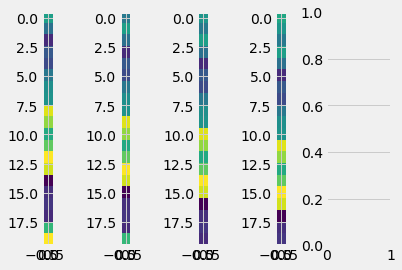

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.imshow(x_train[0][0])
ax2.imshow(x_train[1][0])
ax3.imshow(x_train[2][0])
ax4.imshow(x_train[3][0])
#ax5.imshow(x_train[185][0])

In [ ]:
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))

Shape of x_train: (871, 1, 20, 1)
Shape of x_test: (222, 1, 20, 1)


In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.optimizers import Adam
from keras.layers import Conv1D, Conv2D, MaxPooling2D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
import csv
import collections
from scipy.stats import zscore
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size = (1,2), strides = (2, 2),  padding = 'valid', 
               activation = 'relu', input_shape = (1,steps,1)))
cnn.add(MaxPooling2D(pool_size = (1,2)))
cnn.add(Flatten())
cnn.add(Dense(32, activation="relu"))
cnn.add(Dropout(0.1))
cnn.add(Dense(1, activation="relu"))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1, 10, 32)         96        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                5152      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
____________________________________________________

In [ ]:
cnn.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="CNN_Parameters.hdf5", verbose=0, save_best_only=True)

In [ ]:
history = cnn.fit(x_train,y_train,validation_split=0.2,batch_size = 8, callbacks=[checkpointer],verbose=1,epochs = 30)

Epoch 1/30
87/87 [==============================] - 1s 5ms/step - loss: 126147.2298 - val_loss: 2447.7571
Epoch 2/30
87/87 [==============================] - 0s 2ms/step - loss: 6466.4706 - val_loss: 2347.3762
Epoch 3/30
87/87 [==============================] - 0s 2ms/step - loss: 6998.5684 - val_loss: 2348.2424
Epoch 4/30
87/87 [==============================] - 0s 2ms/step - loss: 6150.3700 - val_loss: 2813.6353
Epoch 5/30
87/87 [==============================] - 0s 2ms/step - loss: 7650.3947 - val_loss: 2142.1929
Epoch 6/30
87/87 [==============================] - 0s 2ms/step - loss: 6343.3964 - val_loss: 2169.3992
Epoch 7/30
87/87 [==============================] - 0s 2ms/step - loss: 6909.4399 - val_loss: 2243.2561
Epoch 8/30
87/87 [==============================] - 0s 2ms/step - loss: 6666.0662 - val_loss: 4224.3662
Epoch 9/30
87/87 [==============================] - 0s 2ms/step - loss: 7157.5831 - val_loss: 2796.8154
Epoch 10/30
87/87 [==============================] - 0s 2ms/st

In [ ]:
cnn.load_weights('CNN_Parameters.hdf5')
pred = cnn.predict(x_test)
print(pred.shape)

(222, 1)


In [ ]:
#pred_temp=scaler.inverse_transform(pred.reshape(len(pred),1))
#pred_temp

In [ ]:
#y_test_temp=scaler.inverse_transform(y_test.reshape(-1,1))


In [ ]:
#y_test_temp

In [ ]:
final_mape=mean_absolute_error(y_test, pred)
print("Mean Absolute Error",final_mape)
final_mse=mean_squared_error(y_test,pred)
print("Mean Squared Error: ",final_mse)
final_rmse=np.sqrt(final_mse)
print("Root Mean Squared Error: ",final_rmse)
final_mse_1=mean_squared_error(y_test,pred)
print("Mean Squared Error: ",final_mse_1)
final_rmse_1=np.sqrt(final_mse_1)
print("Root Mean Squared Error: ",final_rmse_1)


Mean Absolute Error 35.21924404085727
Mean Squared Error:  2089.5976035188596
Root Mean Squared Error:  45.71211659416855
Mean Squared Error:  2089.5976035188596
Root Mean Squared Error:  45.71211659416855


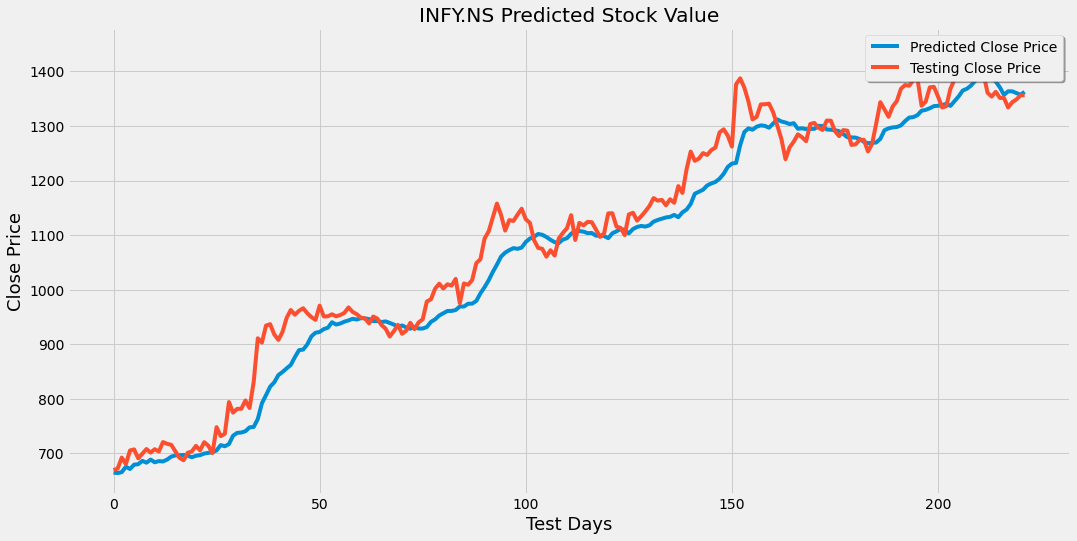

In [ ]:
plt.figure(figsize=(16,8))
plt.title('INFY.NS Predicted Stock Value')
plt.plot(pred, label="Predicted Close Price")
plt.plot(y_test, label="Testing Close Price")
plt.xlabel('Test Days',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend(loc='upper right', fancybox=True, shadow=True)
plt.show()


In [ ]:
#prediction = np.array(pred_temp)
#prediction = pd.DataFrame(pred_temp)
#prediction.to_csv('CNNTECHN.csv')

NameError: ignored